In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset with encoding latin-1 parameter
df = pd.read_csv('data/laptop_price.csv', encoding='latin-1')
df.head()
#df.info()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
#Data Cleaning 
df["Ram"]= df["Ram"].str.replace("GB","").astype(int)
df["Weight"]= df["Weight"].str.replace("kg","").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


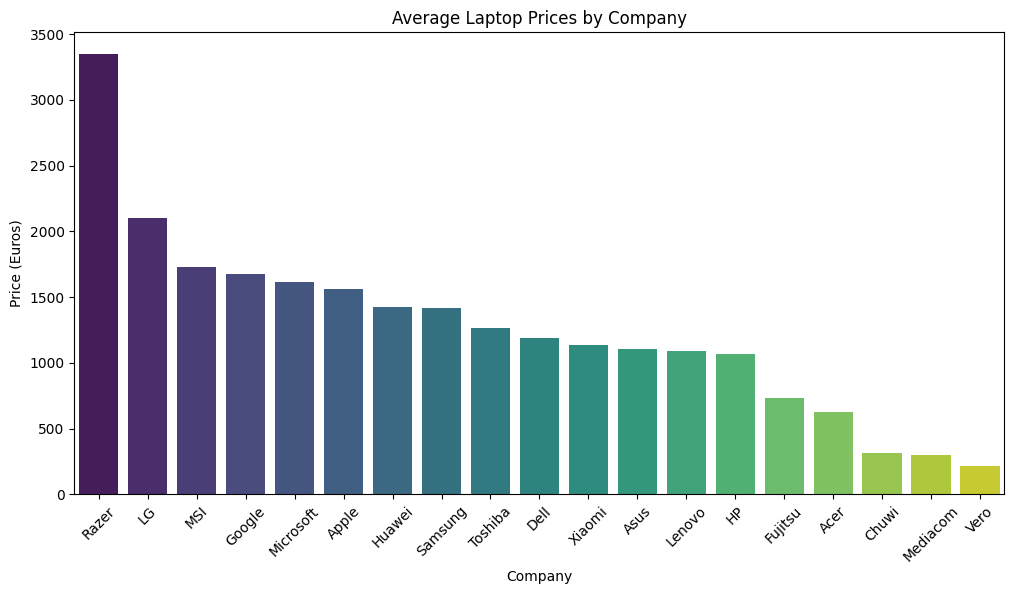

In [5]:
# Visualization: Average Laptop Prices by Company
company_prices= df.groupby("Company")["Price_euros"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=company_prices.index, y=company_prices.values, hue= company_prices.index, legend=False, palette="viridis")
plt.title("Average Laptop Prices by Company")
plt.xlabel("Company")
plt.ylabel("Price (Euros)")
plt.xticks(rotation=45)
plt.show()

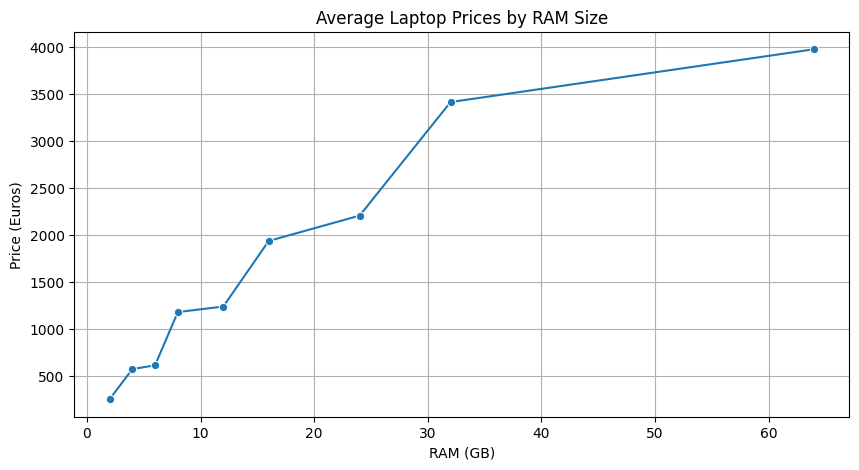

In [ ]:
#ram vs Price Analysis
ram_price_analysis= df.groupby("Ram")["Price_euros"].mean().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=ram_price_analysis.index, y=ram_price_analysis.values, marker="o")
plt.title("Average Laptop Prices by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euros)")
plt.grid(True)
plt.show()

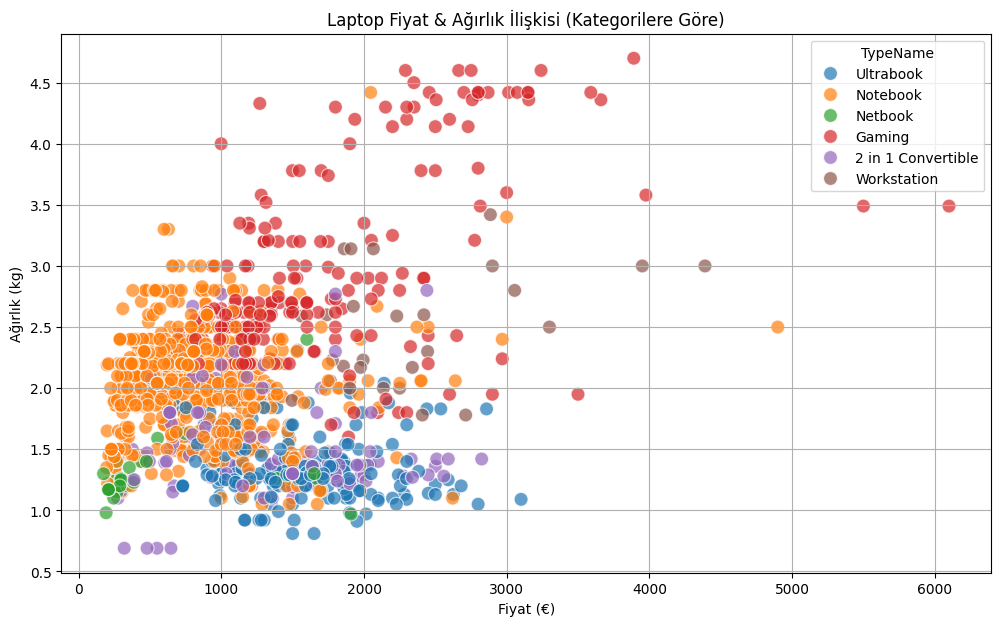

In [ ]:
plt.figure(figsize=(12, 7))

# Scatter plot: Price vs Weight colored by TypeName
sns.scatterplot(x="Price_euros", y="Weight", data=df, hue="TypeName", s=100, alpha=0.7)

plt.title("Laptop Fiyat & Ağırlık İlişkisi (Kategorilere Göre)")
plt.xlabel("Fiyat (€)")
plt.ylabel("Ağırlık (kg)")
plt.grid(True)
plt.show()

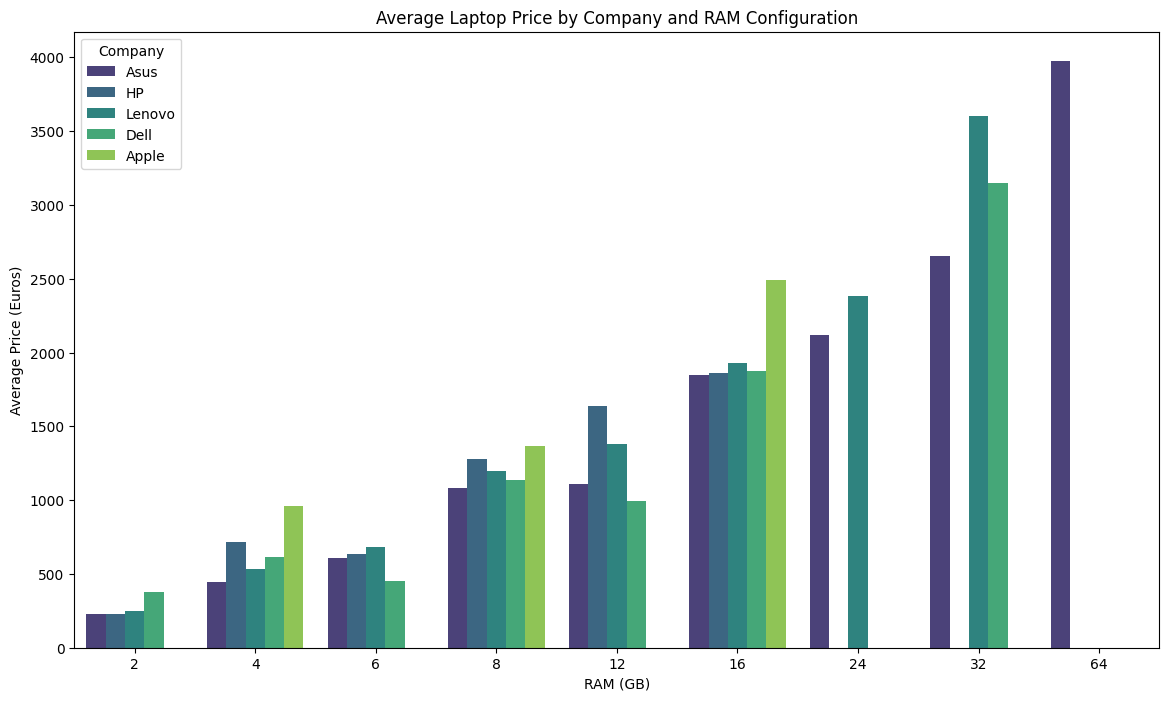

In [ ]:
plt.figure(figsize=(14, 8))

# Create a grouped bar chart
# x = Categories (RAM)
# y = Value (Price)
# hue = Sub-group (Company) - This creates side-by-side bars

selected_brands = ['Apple', 'Dell', 'Lenovo', 'HP', 'Asus']


df_filtered = df[df['Company'].isin(selected_brands)]

# Create the grouped bar chart
# Average price for each RAM configuration by company
sns.barplot(
    x="Ram", 
    y="Price_euros", 
    hue="Company", 
    data=df_filtered, 
    palette="viridis",
    errorbar=None  # Hides the black error lines for a cleaner look
)

plt.title("Average Laptop Price by Company and RAM Configuration")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price (Euros)")
plt.legend(title="Company")
plt.show()